# 1.1 collecting image

In [1]:
import os
import time
import uuid
import cv2

In [3]:
!pip install opencv-python

  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


# 1.2 Annotation image with labelme

In [7]:
IMAGE_PATH = os.path.join('data', 'images')
number_images = 50

In [27]:
cap = cv2.VideoCapture(0)
for i in range (number_images):
    print ('collecting image_num{}'.format(i))
    ret , frame = cap.read()
    imgname = os.path.join(IMAGE_PATH , f'{str(uuid.uuid1())}.jpg')

    cv2.imwrite(imgname , frame)
    cv2.imshow('frame' , frame)
    time.sleep(0.6)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
                            

collecting image_num0
collecting image_num1
collecting image_num2
collecting image_num3
collecting image_num4
collecting image_num5
collecting image_num6
collecting image_num7
collecting image_num8
collecting image_num9
collecting image_num10
collecting image_num11
collecting image_num12
collecting image_num13
collecting image_num14
collecting image_num15
collecting image_num16
collecting image_num17
collecting image_num18
collecting image_num19
collecting image_num20
collecting image_num21
collecting image_num22
collecting image_num23
collecting image_num24
collecting image_num25
collecting image_num26
collecting image_num27
collecting image_num28
collecting image_num29
collecting image_num30
collecting image_num31
collecting image_num32
collecting image_num33
collecting image_num34
collecting image_num35
collecting image_num36
collecting image_num37
collecting image_num38
collecting image_num39
collecting image_num40
collecting image_num41
collecting image_num42
collecting image_num4

In [28]:
!labelme


[INFO   ] __init__:get_config:71 - Loading config file from: C:\Users\satish maurya\.labelmerc
qt.qpa.fonts: Unable to open default EUDC font: "C:\\WINDOWS\\FONTS\\EUDC.TTE"


In [10]:
pip install labelme


  Using cached labelme-5.3.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached imgviz-1.7.4-py3-none-any.whl (7.7 MB)
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
     ---------------------------------------- 6.5/6.5 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 6.8/6.8 MB 729.9 kB/s eta 0:00:00
     ---------------------------------------- 6.4/6.4 MB 1.0 MB/s eta 0:00:00
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
     ---------------------------------------- 77.6/77.6 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 1.4 MB/s eta 0:00:00
  Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
     -------------------------------------- 536.2/536.2 kB 1.1 MB/s eta 0:00:00
     -----

# 2. Review dataset ans build image loading function

## 2.1 Import tensof=rflow and Deps

In [2]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [8]:
! pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 5.8 MB/s eta 0:00:00


## 2.2 limit GPU memory Growth

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    


In [4]:
tf.config.list_physical_devices('GPU')

[]

## 2.3 load images into TF Data pipeline


In [46]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [30]:
images.as_numpy_iterator().next()

b'data\\images\\0153e8ca-5dc2-11ee-98be-089798f1ad4e.jpg'

In [5]:
def load_img(x):
    byte_img = tf.io.read_file(x)
    img  = tf.io.decode_jpeg(byte_img)
    return img

In [48]:
images = images.map(load_img)

NameError: name 'images' is not defined

In [33]:
images.as_numpy_iterator().next()

array([[[165, 164, 162],
        [167, 166, 164],
        [168, 168, 166],
        ...,
        [174, 173, 179],
        [172, 171, 176],
        [169, 168, 173]],

       [[164, 163, 161],
        [166, 165, 163],
        [166, 166, 164],
        ...,
        [175, 174, 179],
        [175, 174, 179],
        [174, 173, 178]],

       [[166, 166, 164],
        [166, 166, 164],
        [166, 166, 164],
        ...,
        [175, 174, 179],
        [175, 176, 180],
        [175, 176, 178]],

       ...,

       [[133, 134, 128],
        [131, 132, 126],
        [132, 131, 126],
        ...,
        [130, 125, 103],
        [131, 126, 104],
        [131, 126, 104]],

       [[135, 135, 127],
        [134, 134, 126],
        [135, 135, 127],
        ...,
        [130, 125, 103],
        [132, 127, 105],
        [133, 128, 106]],

       [[132, 132, 124],
        [133, 133, 125],
        [135, 135, 127],
        ...,
        [131, 126, 104],
        [133, 128, 106],
        [134, 129, 107]]

In [20]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

## 2.4 view raw images with matplotlib

In [49]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [35]:
plot_images = image_generator.next()

In [ ]:
fig , ax = plt.subplots(ncols=4 ,figsize = (20,20))
for indx , image in enumerate(plot_images):
    ax[indx].imshow(image)
plt.show()

 # 3.Partition and unaugmented Data

## 3.1 mannualy split data into train test and val

## 3.2 move the matching labels

In [37]:
   import shutil

In [38]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder , 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
     

        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels')
            shutil.move(existing_filepath, new_filepath)



# 4. aplly image augmentation on images and labels using albumentations

## 4.1 setup albumentation transform pipleine

In [6]:
import albumentations as alb

In [29]:
!pip install --user albumentations

In [7]:
augmentor = alb.Compose([alb.RandomCrop(width=450 , height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format = 'albumentations',
                                                  label_fields=['class_labels'])
                        )

## 4.2 Load a test image and annotation with opencv and json


In [52]:
img = cv2.imread(os.path.join('data','train','images','0a4c1b9e-5dc2-11ee-a8f3-089798f1ad4e.jpg'))

In [53]:
img

array([[[178, 177, 179],
        [178, 177, 179],
        [176, 178, 179],
        ...,
        [196, 189, 196],
        [193, 186, 191],
        [190, 183, 188]],

       [[177, 176, 178],
        [177, 176, 178],
        [176, 178, 179],
        ...,
        [191, 184, 191],
        [190, 183, 188],
        [188, 181, 186]],

       [[176, 175, 177],
        [176, 175, 177],
        [178, 177, 179],
        ...,
        [192, 185, 192],
        [192, 186, 191],
        [192, 186, 191]],

       ...,

       [[136, 139, 144],
        [136, 139, 144],
        [135, 138, 142],
        ...,
        [122, 143, 151],
        [123, 144, 152],
        [123, 144, 152]],

       [[136, 139, 144],
        [136, 139, 144],
        [135, 138, 142],
        ...,
        [123, 145, 151],
        [122, 145, 153],
        [122, 145, 153]],

       [[137, 140, 145],
        [136, 139, 144],
        [135, 138, 142],
        ...,
        [121, 143, 149],
        [119, 142, 150],
        [120, 143, 151]]

In [54]:
with open(os.path.join('data','train','labels','0a4c1b9e-5dc2-11ee-a8f3-089798f1ad4e.json'),'r') as f:
         label = json.load(f)

In [55]:
label['shapes'][0]['points']

[[391.2290502793295, 96.4245810055866],
 [491.7877094972066, 232.17877094972067]]

## 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [56]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [57]:
coords

[391.2290502793295, 96.4245810055866, 491.7877094972066, 232.17877094972067]

In [58]:
coords = list(np.divide(coords,[640 , 480 , 640 , 480]))

In [59]:
coords

[0.6112953910614524,
 0.20088454376163875,
 0.7684182960893853,
 0.48370577281191807]

## 4.4 Apply Augmentation and View Results

In [60]:
augmented = augmentor(image=img , bboxes=[coords], class_labels=['face'])

In [61]:
augmented

{'image': array([[[ 66,  65,  67],
         [107, 106, 108],
         [141, 140, 142],
         ...,
         [128, 132, 133],
         [129, 133, 134],
         [128, 132, 133]],
 
        [[ 67,  66,  68],
         [ 99,  98, 100],
         [142, 141, 143],
         ...,
         [128, 132, 133],
         [128, 132, 133],
         [127, 131, 132]],
 
        [[ 69,  68,  70],
         [ 91,  90,  92],
         [138, 137, 139],
         ...,
         [128, 132, 133],
         [128, 132, 133],
         [127, 131, 132]],
 
        ...,
 
        [[186, 182, 187],
         [188, 185, 187],
         [190, 185, 187],
         ...,
         [173, 178, 177],
         [172, 177, 176],
         [174, 179, 178]],
 
        [[187, 183, 189],
         [188, 184, 189],
         [189, 183, 188],
         ...,
         [173, 178, 177],
         [172, 176, 177],
         [174, 178, 179]],
 
        [[189, 185, 191],
         [188, 184, 189],
         [187, 181, 186],
         ...,
         [175, 177,

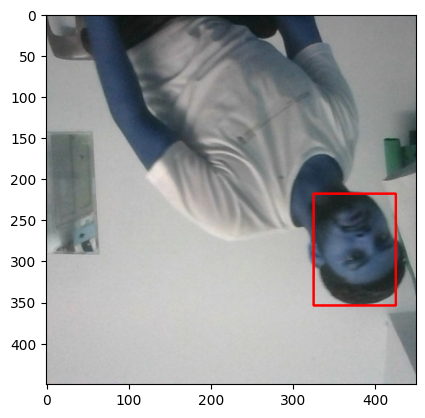

In [62]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
               tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
               (255,0,0),2)
plt.imshow(augmented['image'])

# 5 Build and Run Augmentation pipeline

## 5.1 Run augmentaion pipeline

In [8]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.22285265363128484, 0.2637337057728119, 0.0037534916201117153, 0.0006983240223463951, 'face'].
x_max is less than or equal to x_min for bbox [0.1704783519553072, 0.2707169459962756, 0.0037534916201117153, 0.0018621973929236763, 'face'].
x_max is less than or equal to x_min for bbox [0.2088861731843575, 0.3056331471135941, 0.0, 0.0017987133908922222, 'face'].
x_max is less than or equal to x_min for bbox [0.19317388268156424, 0.30446927374301674, 0.0, 0.008326052715773002, 'face'].


## 5.2 Load Augmented Images to tensoeflow Dataset

In [6]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_img)
train_images = train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images = train_images.map(lambda x: x/225)


In [7]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_img)
test_images = test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x: x/225)

In [8]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_img)
val_images = val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x: x/225)

In [9]:
train_images.as_numpy_iterator().next()

array([[[0.7482639 , 0.74993056, 0.73604167],
        [0.76555556, 0.7670139 , 0.75375   ],
        [0.76631945, 0.76631945, 0.75743055],
        ...,
        [0.58534724, 0.58868057, 0.54256946],
        [0.50472224, 0.49986112, 0.44652778],
        [0.48451388, 0.47958332, 0.42395833]],

       [[0.7725694 , 0.7770139 , 0.7547917 ],
        [0.7645139 , 0.76895833, 0.7467361 ],
        [0.7688889 , 0.7733333 , 0.7511111 ],
        ...,
        [0.48819444, 0.49708334, 0.43930554],
        [0.4846528 , 0.48576388, 0.431875  ],
        [0.47388887, 0.47534722, 0.41909721]],

       [[0.76513886, 0.76958334, 0.7473611 ],
        [0.7644445 , 0.7688889 , 0.74666667],
        [0.7822222 , 0.7866667 , 0.7644445 ],
        ...,
        [0.47715276, 0.48604167, 0.4282639 ],
        [0.47944444, 0.4838889 , 0.42166665],
        [0.48145834, 0.47590277, 0.42256945]],

       ...,

       [[0.5340972 , 0.5385417 , 0.511875  ],
        [0.52881944, 0.53326386, 0.5065972 ],
        [0.5302778 , 0

# 6 prepare labels 

## 6.1 build label loading function

In [10]:
def laod_labels(label_path):
    with open(label_path.numpy() , 'r' , encoding="utf-8") as f:
        label = json.load(f)
    return [label['class']] , label['bbox']

In [11]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json' ,shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(laod_labels, [x], [tf.uint8, tf.float16]))

In [12]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json' ,shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(laod_labels, [x], [tf.uint8, tf.float16]))

In [13]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json' ,shuffle = False)
val_labels = val_labels.map(lambda x: tf.py_function(laod_labels, [x], [tf.uint8, tf.float16]))

In [14]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1921, 0.2583, 0.484 , 0.693 ], dtype=float16))

# 7 Combine Label and image samples

## 7.1 check partition length

In [15]:
train = tf.data.Dataset.zip((train_images , train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

In [16]:
test = tf.data.Dataset.zip((test_images , test_labels))
test = test.shuffle(4000)
test = test.batch(8)
test = test.prefetch(4)

In [17]:
val = tf.data.Dataset.zip((val_images , val_labels))
val = val.shuffle(4000)
val = val.batch(8)
val = val.prefetch(4)

In [18]:
val.as_numpy_iterator().next()

(array([[[[3.8881946e-01, 3.0770832e-01, 2.7763888e-01],
          [3.7402779e-01, 2.9701388e-01, 2.7027777e-01],
          [3.5770833e-01, 2.8215277e-01, 2.4937500e-01],
          ...,
          [1.1333333e+00, 1.0400000e+00, 1.0177778e+00],
          [1.1333333e+00, 1.0400000e+00, 1.0177778e+00],
          [1.1333333e+00, 1.0400000e+00, 1.0177778e+00]],
 
         [[3.8756946e-01, 3.1034723e-01, 2.8423610e-01],
          [3.8222224e-01, 3.0277777e-01, 2.8333333e-01],
          [3.7395832e-01, 2.9840279e-01, 2.6284721e-01],
          ...,
          [1.1288888e+00, 1.0444444e+00, 1.0138888e+00],
          [1.1288888e+00, 1.0444444e+00, 1.0133333e+00],
          [1.1288888e+00, 1.0444444e+00, 1.0133333e+00]],
 
         [[4.0826389e-01, 3.3104166e-01, 3.0493057e-01],
          [3.8618055e-01, 3.0673611e-01, 2.8729168e-01],
          [3.7784722e-01, 3.0229166e-01, 2.6673612e-01],
          ...,
          [1.1332639e+00, 1.0433333e+00, 1.0211111e+00],
          [1.1333333e+00, 1.0438889e+

In [19]:
data_samples = train.as_numpy_iterator()

In [20]:
res = data_samples.next()

In [21]:
res

(array([[[[0.6944444 , 0.6988889 , 0.67395836],
          [0.6992361 , 0.7036806 , 0.6770139 ],
          [0.69666666, 0.70111114, 0.67444444],
          ...,
          [0.30965278, 0.31854168, 0.29631945],
          [0.7022222 , 0.706875  , 0.681875  ],
          [0.7104861 , 0.71493053, 0.68541664]],
 
         [[0.69145834, 0.69590276, 0.6692361 ],
          [0.7027083 , 0.7071528 , 0.679375  ],
          [0.6972917 , 0.7017361 , 0.67506945],
          ...,
          [0.46305555, 0.47361112, 0.4586111 ],
          [0.7315278 , 0.74041665, 0.72805554],
          [0.71875   , 0.7227778 , 0.72076386]],
 
         [[0.70055556, 0.705     , 0.675     ],
          [0.70555556, 0.71      , 0.67444444],
          [0.70708334, 0.71152776, 0.6759722 ],
          ...,
          [0.69930553, 0.7126389 , 0.6815278 ],
          [0.71347225, 0.7223611 , 0.7079167 ],
          [0.7311111 , 0.74      , 0.7218056 ]],
 
         ...,
 
         [[0.9172222 , 0.9216667 , 0.895     ],
          [0.91611

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


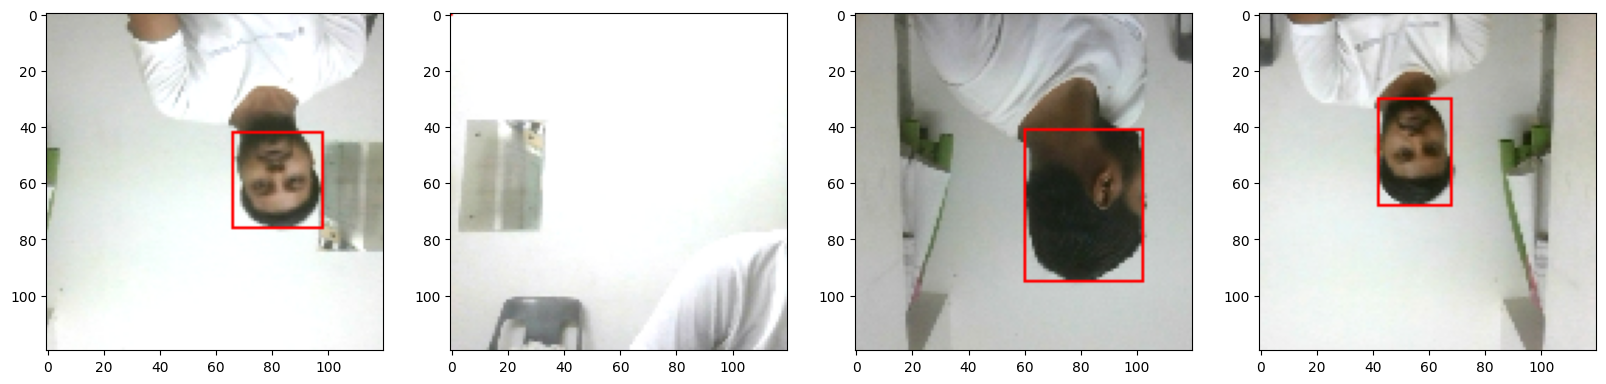

In [22]:
fig, ax= plt.subplots(ncols = 4 , figsize=(20,20))
for idx in range(4):
    sample_img = res[0][idx]
    sample_coords  =res[1][1][idx]
    
    cv2.rectangle(sample_img , 
                  tuple(np.multiply(sample_coords[:2] ,[120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:] , [120,120]).astype(int)),
                       (255,0,0) ,1)
    ax[idx].imshow(sample_img)

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input ,Conv2D,  Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## 8.2 Download vgg16

In [24]:
vgg = VGG16(include_top=False)


In [25]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [26]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top =False)(input_layer)
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048 , activation='relu')(f1)
    class2 = Dense(1,activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048 , activation='relu')(f2)
    regress2 = Dense(4,activation='sigmoid')(regress1)

    facetracker = Model(inputs =input_layer , outputs=[class2,regress2])
    return facetracker


In [27]:
train.as_numpy_iterator().next()

(array([[[[0.44444445, 0.4488889 , 0.42222223],
          [0.43354166, 0.4379861 , 0.411875  ],
          [0.43388888, 0.43833333, 0.4161111 ],
          ...,
          [0.48034722, 0.48479167, 0.44923612],
          [0.49534723, 0.49979165, 0.46909723],
          [0.5222222 , 0.52111113, 0.5       ]],
 
         [[0.44833332, 0.45277777, 0.4261111 ],
          [0.43506944, 0.4395139 , 0.41729167],
          [0.44555557, 0.45      , 0.42777777],
          ...,
          [0.49333334, 0.50222224, 0.45333335],
          [0.5227778 , 0.52729166, 0.49152777],
          [0.6681945 , 0.6726389 , 0.64875   ]],
 
         [[0.423125  , 0.42756945, 0.40090278],
          [0.44506943, 0.44951388, 0.42729166],
          [0.44833332, 0.45277777, 0.43055555],
          ...,
          [0.47166666, 0.48055556, 0.42277777],
          [0.5254861 , 0.53      , 0.50104165],
          [1.0166667 , 1.0183333 , 1.0042361 ]],
 
         ...,
 
         [[0.15402777, 0.20125   , 0.21569444],
          [0.15062

In [28]:
facetracker = build_model()

In [29]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [30]:
x,y=train.as_numpy_iterator().next()

In [31]:
x

array([[[[0.590625  , 0.590625  , 0.590625  ],
         [0.24354167, 0.25243056, 0.24798611],
         [0.25486112, 0.25486112, 0.2515278 ],
         ...,
         [0.5609722 , 0.5609722 , 0.5609722 ],
         [0.5727083 , 0.56493056, 0.56881946],
         [0.47729167, 0.46284723, 0.46729165]],

        [[0.60909724, 0.60909724, 0.6084028 ],
         [0.42430556, 0.43319446, 0.42875   ],
         [0.27006945, 0.27006945, 0.26118055],
         ...,
         [0.5239583 , 0.5239583 , 0.5239583 ],
         [0.59375   , 0.59375   , 0.59375   ],
         [0.5157639 , 0.5079861 , 0.511875  ]],

        [[0.6117361 , 0.6117361 , 0.6028472 ],
         [0.5603472 , 0.5692361 , 0.5559028 ],
         [0.2659028 , 0.2659028 , 0.2570139 ],
         ...,
         [0.4977778 , 0.4977778 , 0.4977778 ],
         [0.5933333 , 0.5933333 , 0.5933333 ],
         [0.57256943, 0.57256943, 0.57256943]],

        ...,

        [[0.76944447, 0.7738889 , 0.75166667],
         [0.7668055 , 0.77125   , 0.7490278 ]

In [32]:
classes,coords = facetracker.predict(x)

1/1 [==============================] - 6s 6s/step


In [33]:
classes,coords

(array([[0.2992013 ],
        [0.30784896],
        [0.3436491 ],
        [0.31317165],
        [0.36116883],
        [0.34156087],
        [0.3582021 ],
        [0.2937418 ]], dtype=float32),
 array([[0.4977464 , 0.36408916, 0.5024195 , 0.6782939 ],
        [0.4131391 , 0.37767354, 0.43355313, 0.677686  ],
        [0.44707045, 0.33330777, 0.4752102 , 0.6446855 ],
        [0.50783175, 0.3315653 , 0.39851722, 0.601593  ],
        [0.46472013, 0.35274607, 0.4398613 , 0.673559  ],
        [0.49022198, 0.27861035, 0.49334282, 0.6867385 ],
        [0.39764023, 0.33987188, 0.46274695, 0.68478954],
        [0.52334374, 0.35124955, 0.48368964, 0.6406475 ]], dtype=float32))

In [34]:
y

(array([[1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0]], dtype=uint8),
 array([[0.5054 , 0.2566 , 0.8506 , 0.8066 ],
        [0.3062 , 0.06726, 0.717  , 0.6904 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.3838 , 0.2852 , 0.795  , 0.908  ],
        [0.2705 , 0.3323 , 0.598  , 0.798  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

# 9 define Losses and Optimizer

## 9.1 define lr and Optimizer

In [35]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [36]:
len(train)

683

In [37]:
opt= tf.keras.optimizers.Adam(learning_rate=0.0001,decay = lr_decay)


## 9.2 Create localization Loss and Classification Loss

In [38]:
def localization_loss(y_true , yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]-yhat[:,:2]))

    h_true = y_true[: , 3] -y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred= yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true-w_pred)  + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [39]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [40]:
regressloss(y[1] , coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7406743>

In [41]:
classloss(y[0] , classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7581761>

# 10. Train Neural Network


In [42]:
class FaceTracker(Model):
    def __init__(self,eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker
        
    def compile(self , opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
        
    def train_step(self, batch, **kwargs):
        
        X, y = batch
        
        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
            
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs):
        X, y =batch
        
        classses, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss=0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [43]:
model = FaceTracker(facetracker)

In [44]:
model.compile(opt, classloss, regressloss)

## 10.2 train 

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist = model.fit(train , epochs=40 , validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
683/683 [==============================] - 142s 187ms/step - total_loss: 0.3410 - class_loss: 0.1067 - regress_loss: 0.2876 - val_total_loss: 0.3608 - val_class_loss: 0.7216 - val_regress_loss: 0.3608
Epoch 2/40
683/683 [==============================] - 114s 151ms/step - total_loss: 0.1012 - class_loss: 0.0386 - regress_loss: 0.0819 - val_total_loss: 0.5599 - val_class_loss: 1.1198 - val_regress_loss: 0.5599
Epoch 3/40
683/683 [==============================] - 116s 156ms/step - total_loss: 0.0493 - class_loss: 0.0182 - regress_loss: 0.0402 - val_total_loss: 0.5093 - val_class_loss: 1.0185 - val_regress_loss: 0.5093
Epoch 4/40
683/683 [==============================] - 121s 165ms/step - total_loss: 0.0401 - class_loss: 0.0153 - regress_loss: 0.0324 - val_total_loss: 0.4292 - val_class_loss: 0.8585 - val_regress_loss: 0.4292
Epoch 5/40
683/683 [==============================] - 119s 160ms/step - total_loss: 0.0425 - class_loss: 0.0158 - regress_loss: 0.0346 - val_total_loss:

In [48]:
hist.history

{'total_loss': [0.017311008647084236,
  0.0306936614215374,
  0.0028006869833916426,
  0.009236280806362629,
  0.005027752369642258,
  0.009982889518141747,
  0.002786805387586355,
  0.004845944698899984,
  0.02233124151825905,
  0.0015680526848882437,
  0.0018443061271682382,
  0.004437665455043316,
  0.00020956157823093235,
  0.0006740628741681576,
  0.0007665159646421671,
  0.0009063577163033187,
  0.0009825710440054536,
  0.0005349710118025541,
  0.00036232933052815497,
  0.0014355126768350601,
  0.0002796555054374039,
  0.0004870317061431706,
  0.0004993784823454916,
  0.00027937162667512894,
  0.00043154985178261995,
  0.00011497225204948336,
  0.0003872416855301708,
  0.0001744823675835505,
  0.0002816421911120415,
  0.00030770813464187086,
  0.00039576063863933086,
  6.0596645198529586e-05,
  0.0002708390820771456,
  0.00014387627015821636,
  0.0002729679108597338,
  0.00033495601383037865,
  0.00025933643337339163,
  0.0002490492770448327,
  0.00025894923601299524,
  0.0003881

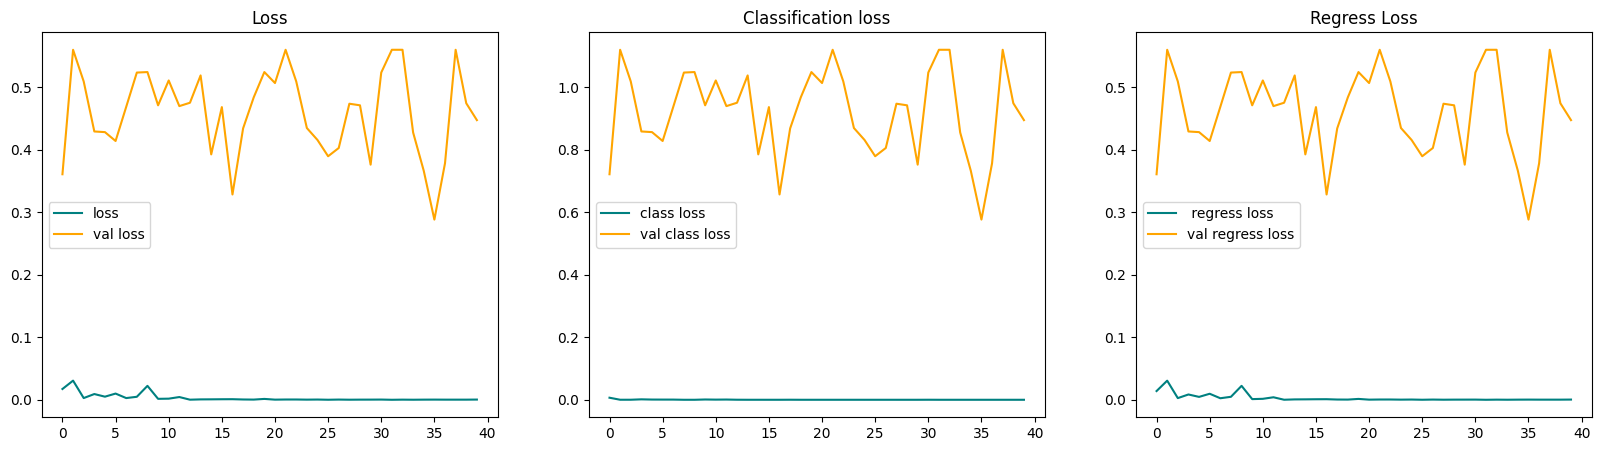

In [49]:
fig, ax = plt.subplots(ncols=3 , figsize=(20,5))
ax[0].plot(hist.history['total_loss'], color='teal', label= 'loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label= 'class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label= ' regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regress Loss')
ax[2].legend()

plt.show()





# 11. Make predictions

## 11.1 make prediction on test set

In [50]:
test_data = test.as_numpy_iterator()

In [51]:
test_sample=test_data.next()

In [52]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


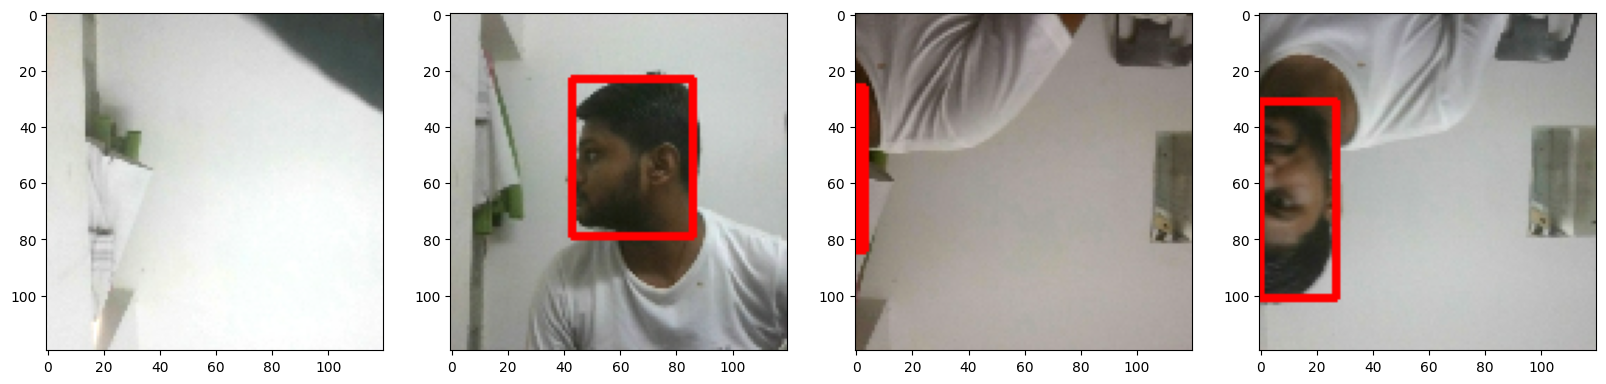

In [53]:
fig ,ax= plt.subplots(ncols =4 , figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                     tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                     tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                           (255,0,0),2)
        
    ax[idx].imshow(sample_image)

In [3]:
from tensorflow.keras.models import load_model

In [1]:
import tensorflow as tf
import numpy as np
import cv2

In [57]:
# facetracker.save('facetracker.h5')

In [4]:
facetracker = load_model('facetracker.h5')

In [5]:
cap =cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame= cap.read()
    frame = frame[50:500, 50:500, ]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5:
        cv2.rectangle(frame ,
                     tuple(np.multiply(sample_coords[:2],[450,450]).astype(int)),
                     tuple(np.multiply(sample_coords[2:],[450,450]).astype(int)),
                      (255,0,0),1)
        cv2.rectangle(frame,
                     tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:],[450,450]).astype(int)),
                      (255,0,0),1)
    
        cv2.putText(frame, 'face',tuple(np.add(np.multiply(sample_coords[:2],[450,450]).astype(int),
                                              [0,-5])),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA
                   )
    cv2.imshow('EyeTrack' , frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

        
            

1/1 [==============================] - 0s 94ms/step


In [76]:
!python --version


Python 3.7.16


In [ ]:
# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     print("Error: Could not open camera.")
# else:
#     while True:
#         ret, frame = cap.read()

#         if not ret:
#             print("Error: Could not read frame.")
#             break

#         frame = frame[50:500, 50:500]

#         rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         resized = tf.image.resize(rgb, (120, 120))

#         yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
#         sample_coords = yhat[1][0]

#         if yhat[0] > 0.5:
#             cv2.rectangle(frame,
#                           tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
#                           tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
#                           (255, 0, 0), 2)

#             cv2.rectangle(frame,
#                           tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
#                           tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
#                           (255, 0, 0), 2)
#             cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
#                                                     [0, -5])),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#         cv2.imshow('EyeTrace', frame)

#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()
        
            

In [1]:
import cv2